In [5]:
import pandas as pd
import numpy as np

df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#data fixing handiling the missing value coloumn

#Remove unesecessaly data coloumn
df=df.drop(['Cabin','Name','Ticket'],axis='columns') 

# for age coloum can fill the value using mean

df=df.fillna(df['Age'].mean())
df



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [7]:
from sklearn.preprocessing import LabelEncoder

le_sex=LabelEncoder()
df['Sex_encod']=le_sex.fit_transform(df['Sex'])
df=df.drop(['Sex'],axis='columns')
df


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_encod
0,1,0,3,22.000000,1,0,7.2500,S,1
1,2,1,1,38.000000,1,0,71.2833,C,0
2,3,1,3,26.000000,0,0,7.9250,S,0
3,4,1,1,35.000000,1,0,53.1000,S,0
4,5,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,1
887,888,1,1,19.000000,0,0,30.0000,S,0
888,889,0,3,29.699118,1,2,23.4500,S,0
889,890,1,1,26.000000,0,0,30.0000,C,1


In [8]:
dummies=pd.get_dummies(df['Embarked']).astype(int)
dummies

,29.699118,C,Q,S
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,0,1,0,0


In [9]:
df_dums=pd.concat([df,dummies],axis='columns')
df=df_dums
df=df.drop(['Embarked'],axis='columns')
df=df.drop([29.69911764705882],axis='columns')
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encod,C,Q,S
0,1,0,3,22.000000,1,0,7.2500,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,1,0,0


In [10]:
cr=df.corr()
cr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encod,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.027121
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_encod,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<Axes: >

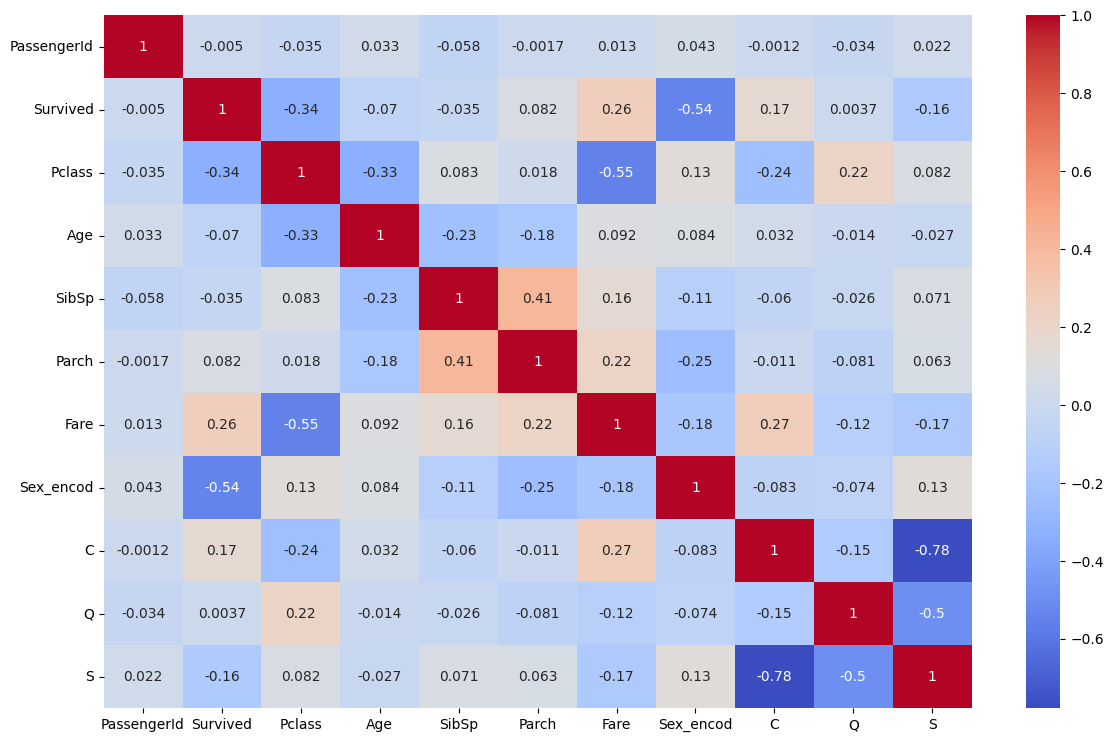

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14,9))
sns.heatmap(cr,annot=True,cmap='coolwarm')


In [ ]:
df=df.drop(['SibSp','Parch','Q'],axis='columns')
df

,PassengerId,Survived,Pclass,Age,Fare,Sex_encod,C,S
0,1,0,3,22.000000,7.2500,1,0,1
1,2,1,1,38.000000,71.2833,0,1,0
2,3,1,3,26.000000,7.9250,0,0,1
3,4,1,1,35.000000,53.1000,0,0,1
4,5,0,3,35.000000,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,13.0000,1,0,1
887,888,1,1,19.000000,30.0000,0,0,1
888,889,0,3,29.699118,23.4500,0,0,1
889,890,1,1,26.000000,30.0000,1,1,0


Interesting Fact: Passengers with fares above 100 had a 73.6% survival rate, compared to 38.4% overall.


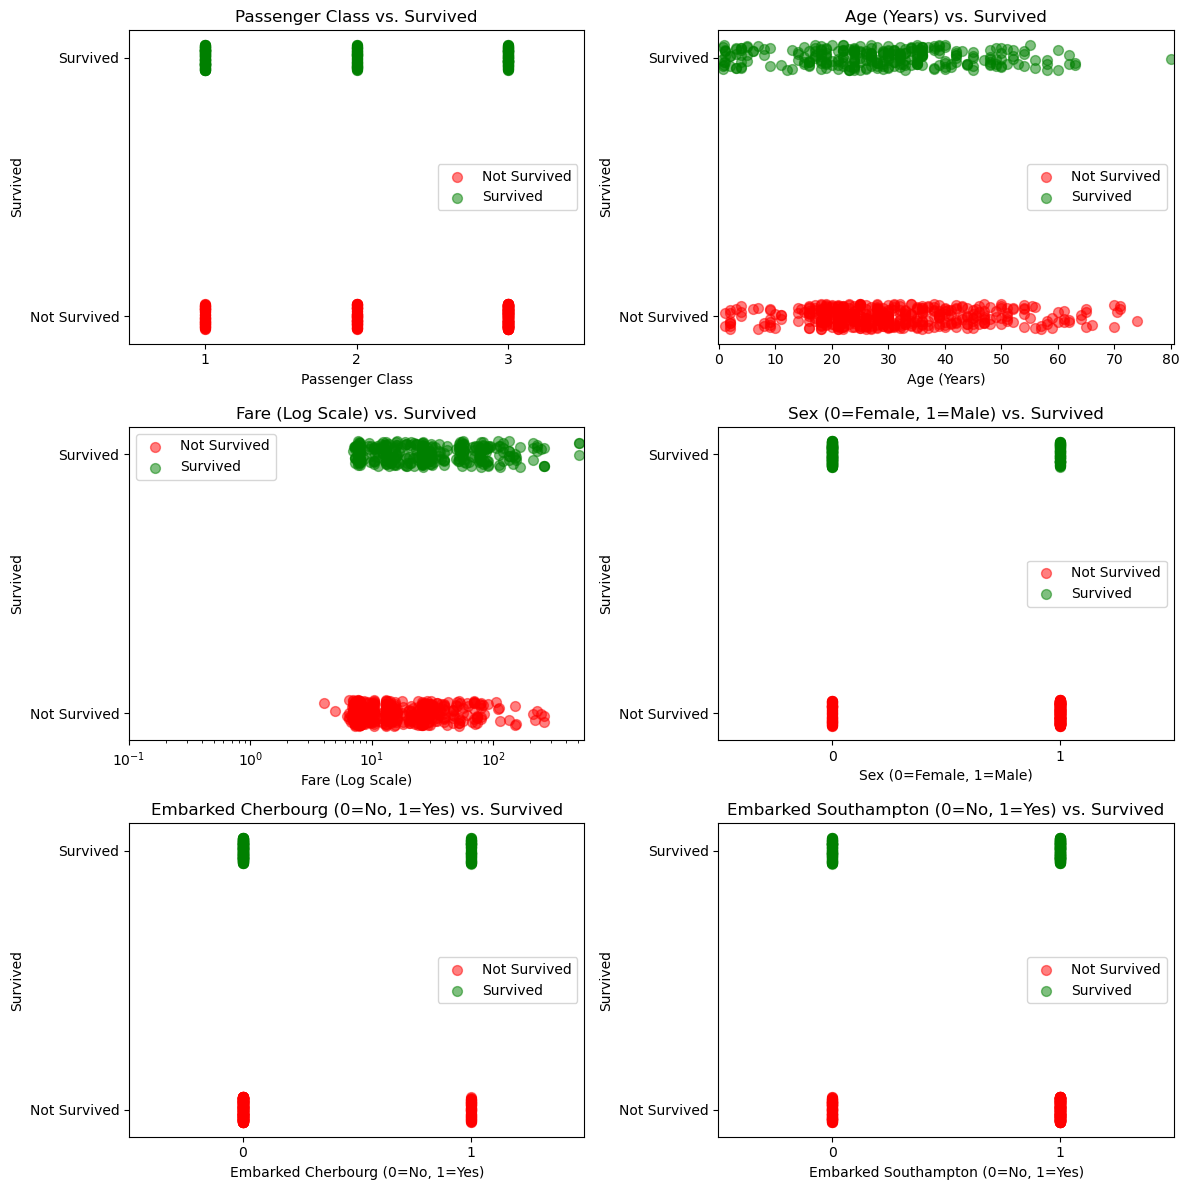

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
# Ensure 'df' is saved in your working directory
data = pd.read_csv('DFF.csv')

# Clean data: Replace 29.69911764705882 with NaN for missing Age values
data['Age'] = data['Age'].replace(29.69911764705882, np.nan)

# Define features to plot against Survived
features = [
    {'name': 'Pclass', 'label': 'Passenger Class', 'xticks': [1, 2, 3]},
    {'name': 'Age', 'label': 'Age (Years)'},
    {'name': 'Fare', 'label': 'Fare (Log Scale)', 'log_scale': True},
    {'name': 'Sex_encod', 'label': 'Sex (0=Female, 1=Male)', 'xticks': [0, 1]},
    {'name': 'C', 'label': 'Embarked Cherbourg (0=No, 1=Yes)', 'xticks': [0, 1]},
    {'name': 'S', 'label': 'Embarked Southampton (0=No, 1=Yes)', 'xticks': [0, 1]}
]

# Set up the plot grid
n_features = len(features)
n_cols = 2
n_rows = (n_features + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4), squeeze=False)
axes = axes.flatten()

# Add jitter to Survived values
jitter = 0.05
data['Survived_jitter'] = data['Survived'] + np.random.uniform(-jitter, jitter, size=len(data))

# Generate scatter plots
for i, feature in enumerate(features):
    ax = axes[i]
    name = feature['name']
    label = feature['label']
    
    # Separate survived and not survived
    survived = data[data['Survived'] == 1]
    not_survived = data[data['Survived'] == 0]
    
    # Plot scatter points
    ax.scatter(not_survived[name], not_survived['Survived_jitter'], c='red', label='Not Survived', alpha=0.5, s=50)
    ax.scatter(survived[name], survived['Survived_jitter'], c='green', label='Survived', alpha=0.5, s=50)
    
    # Customize plot
    ax.set_xlabel(label)
    ax.set_ylabel('Survived')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Not Survived', 'Survived'])
    ax.legend()
    
    # Set x-axis properties
    if 'xticks' in feature:
        ax.set_xticks(feature['xticks'])
    if feature.get('log_scale'):
        ax.set_xscale('log')
        ax.set_xlim(0.1, data[name].max() * 1.1)
    else:
        ax.set_xlim(data[name].min() - 0.5, data[name].max() + 0.5)
    
    ax.set_title(f'{label} vs. Survived')

# Remove empty subplot if any
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Calculate interesting fact: Survival rate for high fares (>100)
high_fare = data[data['Fare'] > 100]
high_fare_survival_rate = (high_fare['Survived'].mean() * 100).round(1)
overall_survival_rate = (data['Survived'].mean() * 100).round(1)
print(f"Interesting Fact: Passengers with fares above 100 had a {high_fare_survival_rate}% survival rate, "f"compared to {overall_survival_rate}% overall.")

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X=df.drop(['Survived'],axis='columns')
Y=df['Survived']
model=tree.DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
model.fit(x_train, y_train)
model.score(X,Y)

0.9494949494949495

In [ ]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)